# **Indian School Education Statistics**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

In [2]:
dropout_df = pd.read_csv('dropout-ratio-2012-2015.csv')
gross_df = pd.read_csv('gross-enrollment-ratio-2013-2016.csv')
comp_df = pd.read_csv('percentage-of-schools-with-comps-2013-2016.csv')
elec_df = pd.read_csv('percentage-of-schools-with-electricity-2013-2016.csv')
water_df = pd.read_csv('percentage-of-schools-with-water-facility-2013-2016.csv')
boys_toilet_df = pd.read_csv('schools-with-boys-toilet-2013-2016.csv')
girls_toilet_df = pd.read_csv('schools-with-girls-toilet-2013-2016.csv')


## Computer

In [3]:
comp_df.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.00,100.00,97.92,0.00,0.00,100.00,0.00,53.06
1,Andaman & Nicobar Islands,2014-15,30.94,76.54,92.11,100.00,94.74,100.00,0.00,0.00,100.00,0.00,57.25
2,Andaman & Nicobar Islands,2015-16,28.44,78.57,92.50,0.00,94.74,100.00,0.00,0.00,100.00,0.00,57.00
3,Andhra Pradesh,2013-14,12.73,42.72,86.99,45.45,17.07,68.18,73.23,60.00,33.33,19.32,29.57
4,Andhra Pradesh,2014-15,10.29,44.15,88.46,50.00,62.22,68.38,76.59,70.97,66.67,41.60,28.06


### Sorting all states based on all school percentage

In [4]:
list = comp_df.sort_values(['All Schools'],ascending=False)
list.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
55,Lakshadweep,2014-15,100.00,100.00,100.0,100.0,100.00,0.00,0.0,0.0,100.0,0.0,100.00
54,Lakshadweep,2013-14,100.00,100.00,100.0,100.0,100.00,0.00,0.0,0.0,100.0,0.0,100.00
56,Lakshadweep,2015-16,100.00,100.00,100.0,100.0,100.00,100.00,0.0,0.0,100.0,0.0,100.00
80,Puducherry,2015-16,99.28,97.67,100.0,100.0,100.00,96.99,100.0,0.0,100.0,100.0,98.77
79,Puducherry,2014-15,98.25,96.84,100.0,100.0,98.08,95.65,100.0,0.0,100.0,100.0,97.81


In [5]:
comp_df.shape

(110, 13)

In [6]:
comp_df.columns

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')

In [7]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State_UT                          110 non-null    object 
 1   year                              110 non-null    object 
 2   Primary_Only                      110 non-null    float64
 3   Primary_with_U_Primary            110 non-null    float64
 4   Primary_with_U_Primary_Sec_HrSec  110 non-null    float64
 5   U_Primary_Only                    110 non-null    float64
 6   U_Primary_With_Sec_HrSec          110 non-null    float64
 7   Primary_with_U_Primary_Sec        110 non-null    float64
 8   U_Primary_With_Sec                110 non-null    float64
 9   Sec_Only                          110 non-null    float64
 10  Sec_with_HrSec.                   110 non-null    float64
 11  HrSec_Only                        110 non-null    float64
 12  All Scho

## Bar Chat Analysis

In [8]:
px.bar(data_frame=comp_df,x = 'State_UT',y = 'All Schools',labels = {'x':'State and UT','y':'All Schools'},opacity=0.8,color_discrete_sequence=['blue'])

## Pie Chart Analysis

In [9]:
chart = px.pie(data_frame=list,values = 'All Schools',names='State_UT',height = 600)
chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

chart.update_layout(title_x = 0.5,
                   geo = dict(showframe = False,
                             showcoastlines = False))
chart.show()

In [10]:
cols = ['Primary_Only','Primary_with_U_Primary','Primary_with_U_Primary_Sec','Primary_with_U_Primary_Sec_HrSec','All Schools']

## State-wise analysis

In [11]:
def state_plot(state):
    sns.set(font_scale = 1.11)
    sns.set_style("white")

    #filt state
    filt_state = (comp_df['State_UT'] == state)
    ax = comp_df.loc[filt_state][cols].plot.bar(figsize=(15,6))
    sns.despine(left=True, bottom=True)
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title(f'{state} in detail',size=21)
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

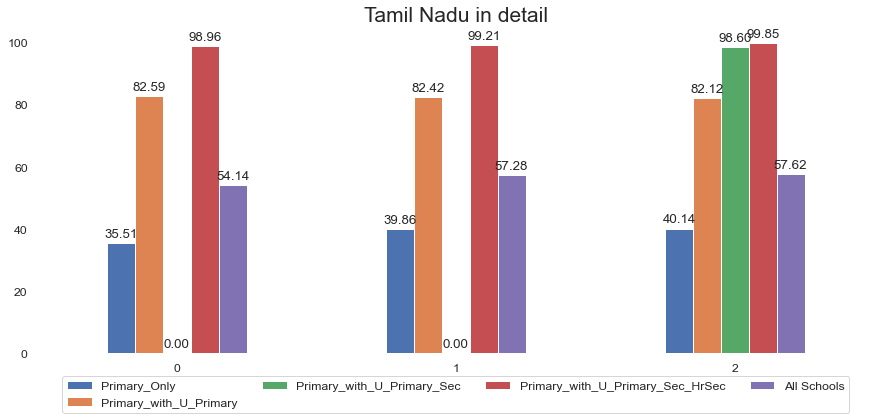

In [12]:
state_plot('Tamil Nadu')

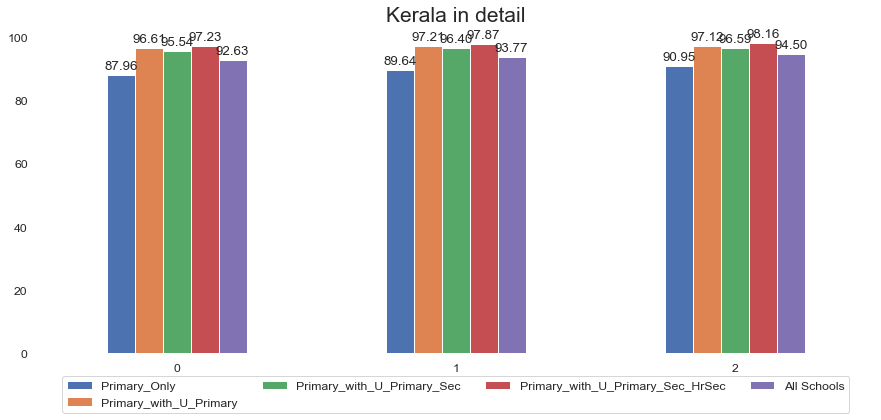

In [13]:
state_plot('Kerala')

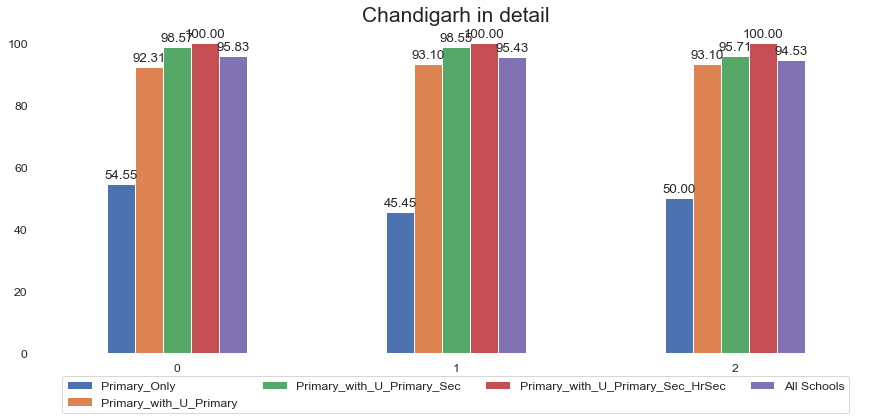

In [14]:
state_plot('Chandigarh')

## Water

In [15]:
water_df.head()

,State/UT,Year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74


In [16]:
px.bar(data_frame=water_df,x = 'State/UT',y = 'All Schools',labels = {'x':'State and UT','y':'All Schools'},opacity=0.8,color_discrete_sequence=['blue'])

In [17]:
def state_plot(state):
    sns.set(font_scale = 1.11)
    sns.set_style("white")

    #filt state
    filt_state = (water_df['State/UT'] == state)
    ax = water_df.loc[filt_state][cols].plot.bar(figsize=(15,6))
    sns.despine(left=True, bottom=True)
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title(f'{state} in detail',size=21)
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

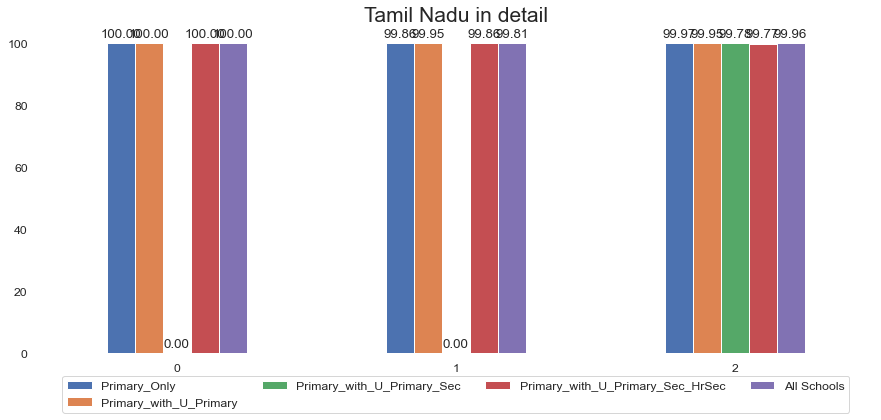

In [18]:
state_plot('Tamil Nadu')

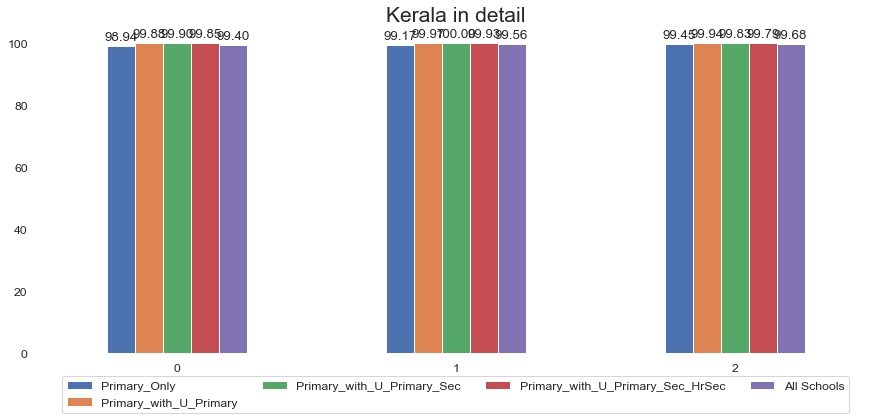

In [19]:
state_plot('Kerala')

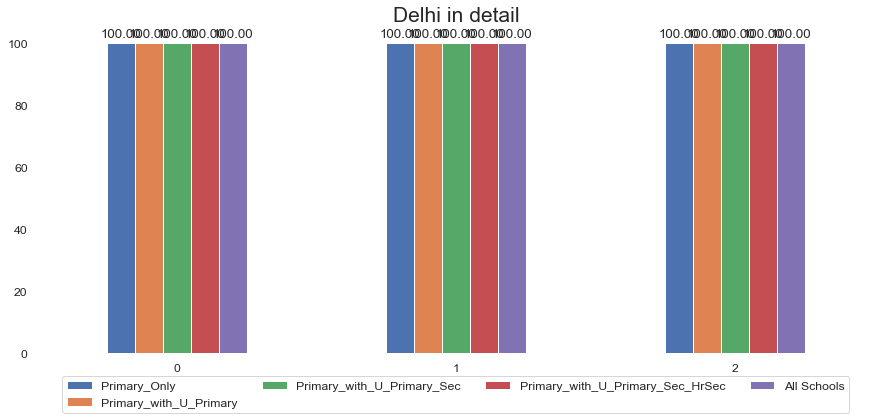

In [20]:
state_plot('Delhi')

## Electricity

In [21]:
elec_df.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,82.42,96.05,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,88.86
1,Andaman & Nicobar Islands,2014-15,80.72,96.30,100.00,100.0,100.00,100.00,0.00,0.00,100.00,0.00,88.89
2,Andaman & Nicobar Islands,2015-16,82.11,97.62,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,90.10
3,Andhra Pradesh,2013-14,87.66,93.57,99.32,100.0,67.48,96.19,96.15,97.50,100.00,91.27,90.34
4,Andhra Pradesh,2014-15,91.08,94.70,100.00,100.0,86.11,97.60,97.11,93.55,83.33,93.21,92.76


In [22]:
def state_plot(state):
    sns.set(font_scale = 1.11)
    sns.set_style("white")

    #filt state
    filt_state = (elec_df['State_UT'] == state)
    ax = elec_df.loc[filt_state][cols].plot.bar(figsize=(15,6))
    sns.despine(left=True, bottom=True)
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title(f'{state} in detail',size=21)
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend

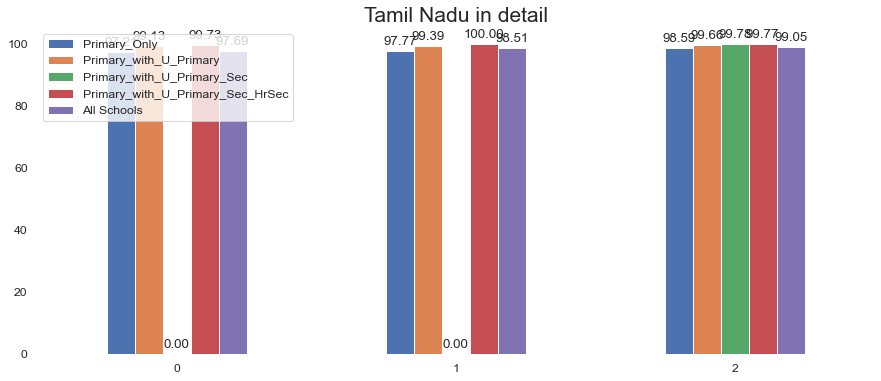

In [23]:
state_plot('Tamil Nadu')

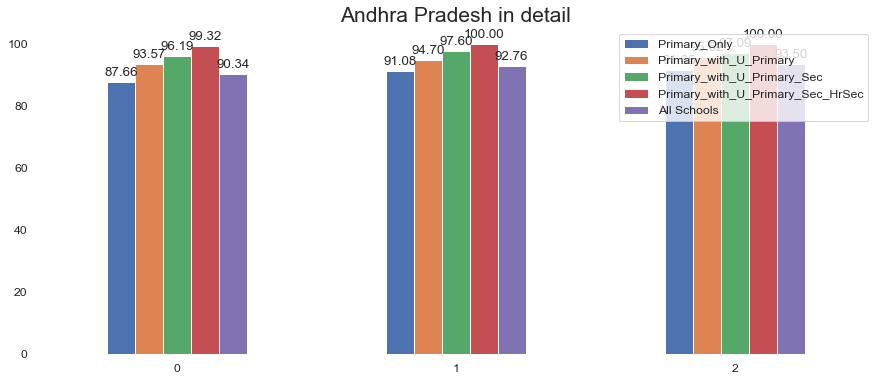

In [24]:
state_plot('Andhra Pradesh')

## Boils Toilet

In [25]:
boys_toilet_df.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34


In [26]:
boys_toilet_df['State_UT'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India'], dtype=object)

In [27]:
def state_plot(state):
    sns.set(font_scale = 1.11)
    sns.set_style("white")

    #filt state
    filt_state = (boys_toilet_df['State_UT'] == state)
    ax = boys_toilet_df.loc[filt_state][cols].plot.bar(figsize=(15,6))
    sns.despine(left=True, bottom=True)
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title(f'{state} in detail',size=21)
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
 

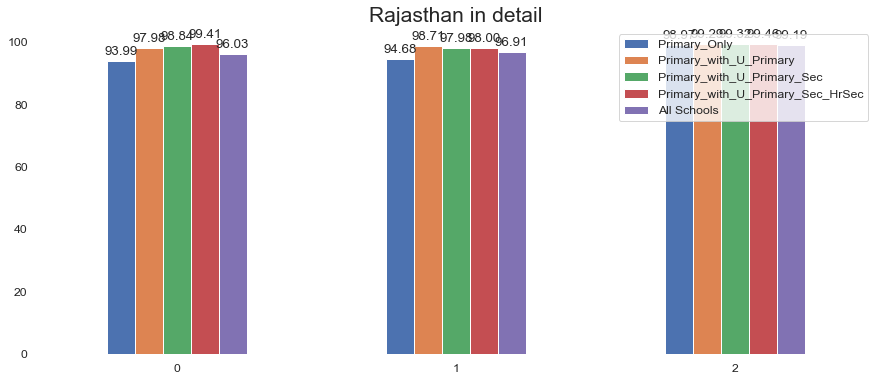

In [28]:
state_plot('Rajasthan')

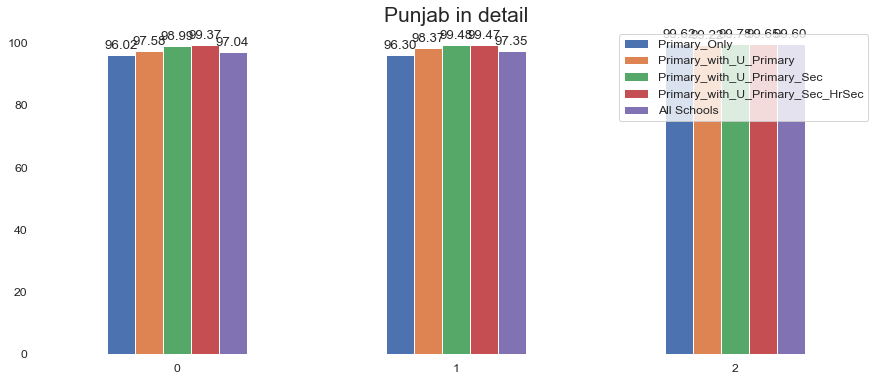

In [29]:
state_plot('Punjab')

## Girls Toilet

In [30]:
girls_toilet_df.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,All India,2013-14,88.68,95.98,98.81,91.39,98.25,97.33,94.40,99.06,98.36,76.14,91.23
1,All India,2014-15,91.21,96.92,99.48,91.39,99.23,98.19,96.61,90.26,94.05,90.94,93.08
2,All India,2015-16,96.95,99.03,99.72,96.32,99.60,99.31,98.82,95.18,98.31,96.22,97.52
3,Andaman & Nicobar Islands,2013-14,89.74,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,93.44
4,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00


In [31]:
def state_plot(state):
    sns.set(font_scale = 1.11)
    sns.set_style("white")

    #filt state
    filt_state = (girls_toilet_df['State_UT'] == state)
    ax = girls_toilet_df.loc[filt_state][cols].plot.bar(figsize=(15,6))
    sns.despine(left=True, bottom=True)
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title(f'{state} in detail',size=21)
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

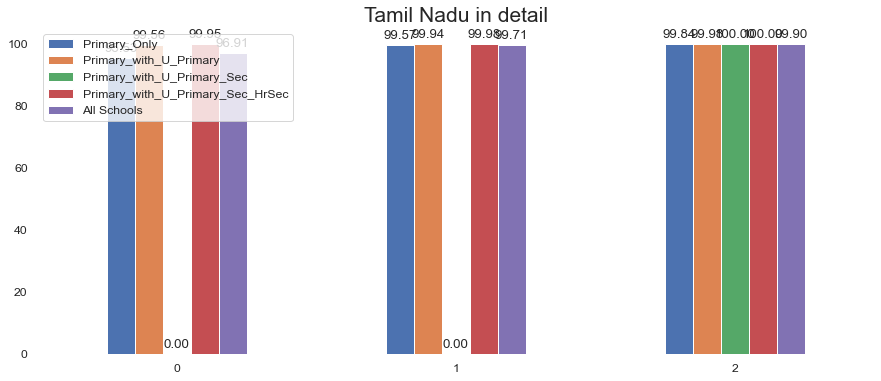

In [32]:
state_plot('Tamil Nadu')

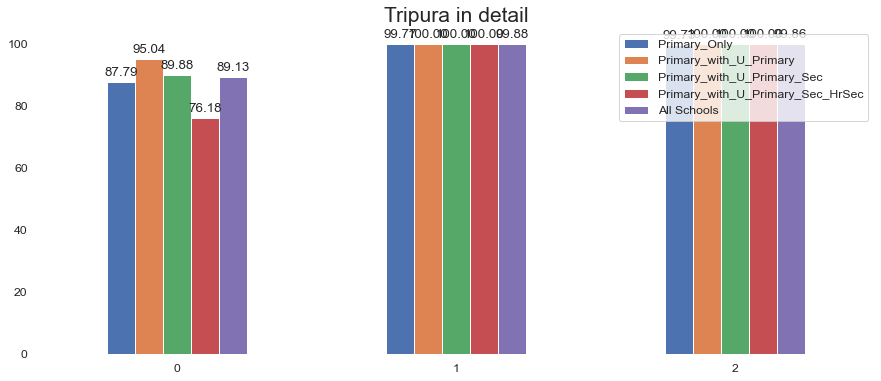

In [33]:
state_plot('Tripura')

## Gross enrollment ratio

In [34]:
gross_df.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7


In [35]:
gross_df.dtypes

State_UT                   object
Year                       object
Primary_Boys              float64
Primary_Girls             float64
Primary_Total             float64
Upper_Primary_Boys        float64
Upper_Primary_Girls       float64
Upper_Primary_Total       float64
Secondary_Boys            float64
Secondary_Girls           float64
Secondary_Total           float64
Higher_Secondary_Boys      object
Higher_Secondary_Girls     object
Higher_Secondary_Total     object
dtype: object

In [36]:
gross_df.columns

Index(['State_UT', 'Year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

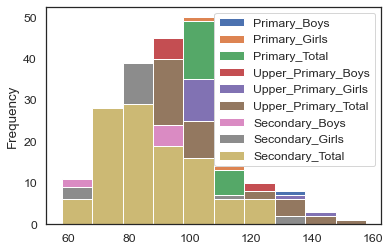

In [37]:
gross_df.plot.hist()

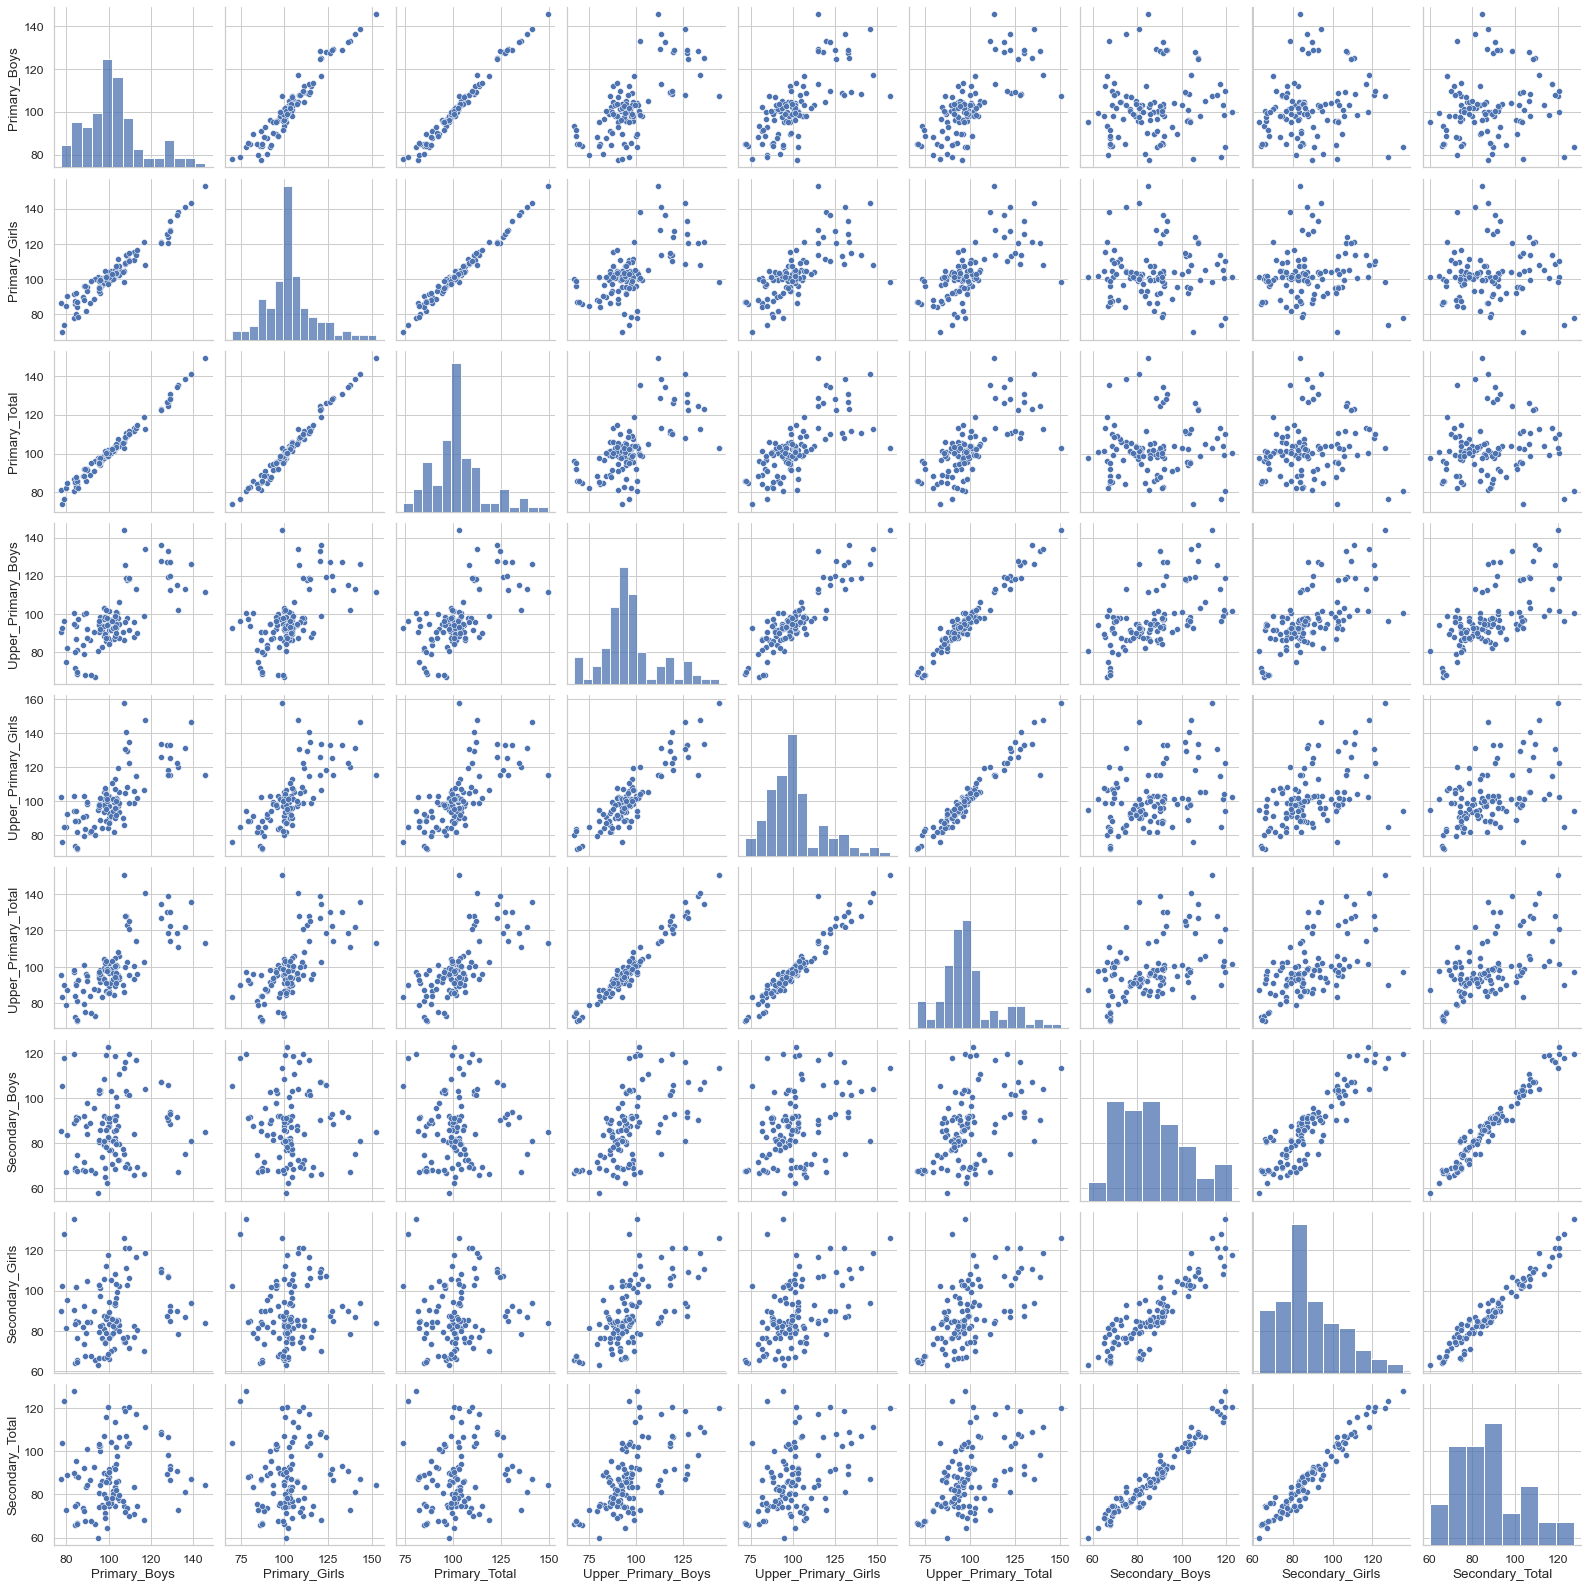

In [38]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(gross_df)
plt.show()

## Dropout Ratio

In [39]:
dropout_df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [40]:
dropout_df['State_UT'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal  Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya  Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil  Nadu', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'All India'], dtype=object)

In [41]:
#Some state names occur two times with different spellings, so we chnage it.

dropout_df['State_UT'] = dropout_df['State_UT'].apply(lambda i: "Arunachal Pradesh" if i == 'Arunachal  Pradesh' else i)
dropout_df['State_UT'] = dropout_df['State_UT'].apply(lambda i: "Madhya Pradesh" if i == 'Madhya  Pradesh' else i)
dropout_df['State_UT'] = dropout_df['State_UT'].apply(lambda i: "Tamil Nadu" if i == 'Tamil  Nadu' else i)

In [42]:
cols1 = dropout_df.columns.to_list()

In [43]:
#Filling NR with 0 and string value to 0 
imputer = SimpleImputer(missing_values = 'NR', strategy='constant', fill_value=0)
imputer_1 = SimpleImputer(missing_values = 'Uppe_r_Primary', strategy='constant', fill_value=0)

In [44]:
dropout = imputer.fit_transform(dropout_df)
dropout = pd.DataFrame(imputer_1.fit_transform(dropout), columns=cols1)

In [45]:
dropout.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,0,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [46]:
dropout['Primary_Girls'] = pd.to_numeric(dropout['Primary_Girls'], errors='coerce')
dropout['Primary_Boys'] = pd.to_numeric(dropout['Primary_Boys'], errors='coerce')
dropout['Primary_Total'] = pd.to_numeric(dropout['Primary_Total'], errors='coerce')
dropout['Upper Primary_Boys'] = pd.to_numeric(dropout['Upper Primary_Boys'], errors='coerce')
dropout['Upper Primary_Girls'] = pd.to_numeric(dropout['Upper Primary_Girls'], errors='coerce')
dropout['Upper Primary_Total'] = pd.to_numeric(dropout['Upper Primary_Total'], errors='coerce')
dropout['Secondary _Boys'] = pd.to_numeric(dropout['Secondary _Boys'], errors='coerce')
dropout['Secondary _Girls'] = pd.to_numeric(dropout['Secondary _Girls'], errors='coerce')
dropout['Secondary _Total'] = pd.to_numeric(dropout['Secondary _Total'], errors='coerce')
dropout['HrSecondary_Boys'] = pd.to_numeric(dropout['HrSecondary_Boys'], errors='coerce')
dropout['HrSecondary_Girls'] = pd.to_numeric(dropout['HrSecondary_Girls'], errors='coerce')
dropout['HrSecondary_Total'] = pd.to_numeric(dropout['HrSecondary_Total'], errors='coerce')

In [47]:
dropout = dropout.set_index(['State_UT', 'year'])
dropout.index.is_unique

True

In [48]:
dropout.head()

Primary_Boys  Primary_Girls  Primary_Total  \
State_UT       year                                                  
A & N Islands  2012-13          0.83           0.51           0.68   
               2013-14          1.35           1.06           1.21   
               2014-15          0.47           0.55           0.51   
Andhra Pradesh 2012-13          3.30           3.05           3.18   
               2013-14          4.31           4.39           4.35   

                        Upper Primary_Boys  Upper Primary_Girls  \
State_UT       year                                               
A & N Islands  2012-13                0.00                 1.09   
               2013-14                0.00                 1.54   
               2014-15                1.44                 1.95   
Andhra Pradesh 2012-13                3.21                 3.51   
               2013-14                3.46                 4.12   

                        Upper Primary_Total  Secondary _Boys  \
State_UT       year                                            
A & N Islands  2012-13                 1.23             5.57   
               2013-14                 0.51             8.36   
               2014-15                 1.69            11.47   
Andhra Pradesh 2012-13                 3.36            12.21   
               2013-14                 3.78            11.95   

                        Secondary _Girls  Secondary _Total  HrSecondary_Boys  \
State_UT       year                                                            
A & N Islands  2012-13              5.55              5.56             17.66   
               2013-14              5.98              7.20             18.94   
               2014-15              8.16              9.87             21.05   
Andhra Pradesh 2012-13             13.25             12.72              2.66   
               2013-14             13.37             12.65             12.65   

                        HrSecondary_Girls  HrSecondary_Total  
State_UT       year                                           
A & N Islands  2012-13              10.15              14.14  
               2013-14              12.20              15.87  
               2014-15              12.21              16.93  
Andhra Pradesh 2012-13               0.00               0.35  
               2013-14              10.85              11.79

## Correlation

<AxesSubplot:ylabel='State_UT-year'>

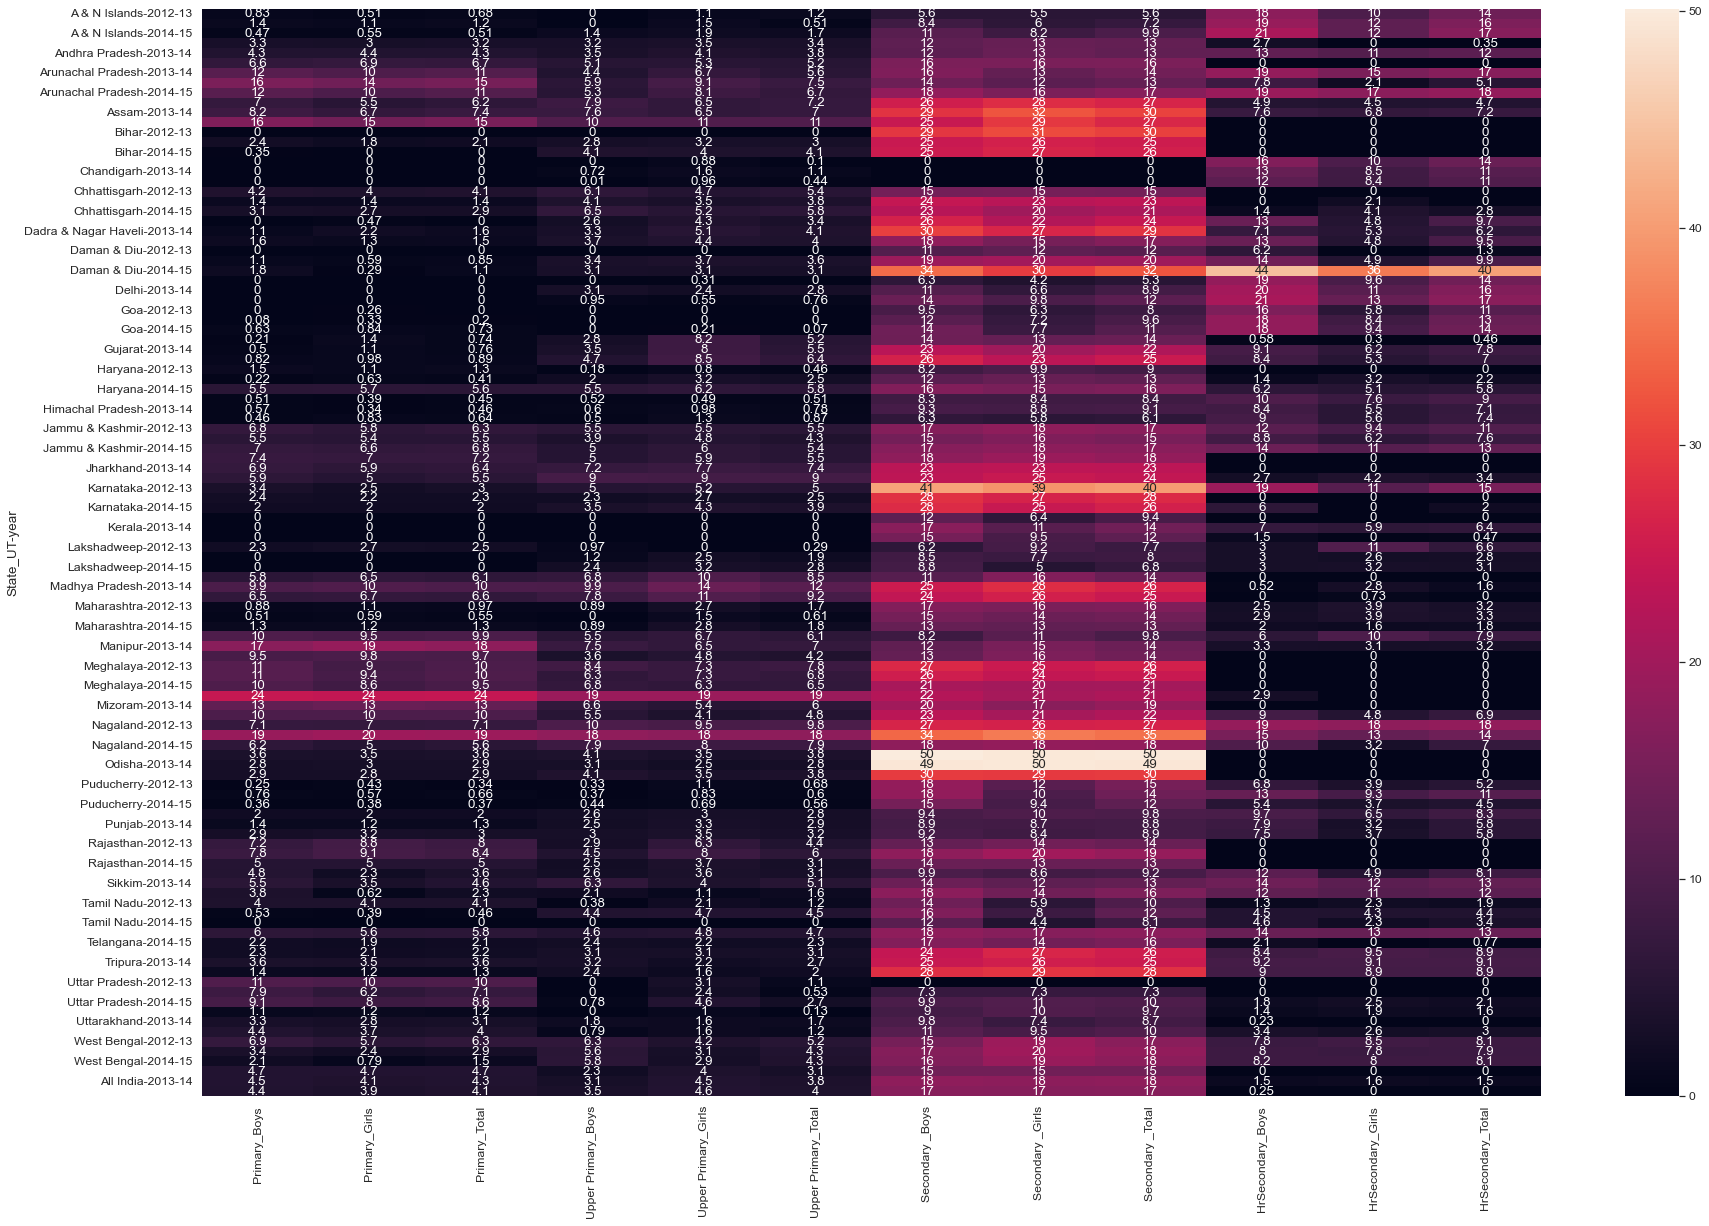

In [49]:
plt.figure(figsize=(30, 20))
sns.heatmap(dropout, annot = True)

From the above correlation, We can say that Odisha has most dropout ratio.